Section 1: Questions to Answer
1. What questions do you want to answer?

How accurately can COVID-19 diagnosis be predicted based on symptoms and other factors?
How can effective screening using machine learning models reduce the burden on healthcare systems?
What impact can accurate prediction have on medical treatment for COVID-19?
2. Why is your proposal important in today’s world?

Accurate COVID-19 prediction is crucial for efficient resource allocation in healthcare, reducing the burden on medical facilities, and improving patient outcomes. Predictive models can streamline screening processes and aid in timely intervention.

3. How predicting a disease accurately can improve medical treatment?

Accurate prediction allows for early identification of COVID-19 cases, enabling prompt medical intervention, resource allocation, and better patient care. It helps prioritize high-risk cases and optimizes the use of medical resources.

4. How is it going to impact the medical field in terms of effective screening and reducing healthcare burden?

Accurate prediction facilitates targeted screening, optimizing resource utilization. It allows for early identification of potential cases, reducing the strain on healthcare systems and ensuring timely and appropriate treatment.

5. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in the future for any other disease?

The proposed method can serve as a template for predicting other infectious diseases, improving response times, and optimizing resource allocation during health crises. The approach can be adapted for future pandemics or outbreaks.

Section 2: Initial Hypothesis
1. Initial Hypothesis (or hypotheses)

Hypothesis 1: Symptoms such as cough, fever, and shortness of breath will be crucial in predicting COVID-19.

Hypothesis 2: Machine learning models incorporating demographic information will outperform models based solely on symptoms.

Hypothesis 3: Early intervention based on accurate predictions will significantly improve patient outcomes.

Section 3: Data Analysis Approach
1. What approach are you going to take to prove or disprove your hypothesis?

Exploratory Data Analysis (EDA) to understand the distribution of variables, correlation analysis, and statistical tests to validate hypotheses. Visualizations to identify patterns in the data.

2. What feature engineering techniques will be relevant to your project?

Creation of new features based on symptom combinations, handling missing data, and encoding categorical variables. Feature scaling and normalization as needed.

3. Please justify your data analysis approach.

EDA helps uncover patterns, correlations, and potential outliers, providing insights into feature importance. Feature engineering enhances model performance by creating meaningful input features.

4. Identify important patterns in your data using the EDA approach to justify your findings.

Exploring relationships between symptoms, demographic factors, and COVID-19 outcomes will help identify patterns and guide feature selection.

Section 4: Machine Learning Approach
1. What method will you use for machine learning-based predictions of COVID-19?

Utilizing supervised machine learning models such as Logistic Regression, Decision Trees, Random Forest, and Support Vector Machines for classification tasks.

2. Please justify the most appropriate model.

Selection based on model performance metrics (accuracy, precision, recall, F1-score) on validation sets. Choosing the model that balances predictive accuracy and interpretability.

3. Please perform necessary steps required to improve the accuracy of your model.

Hyperparameter tuning, cross-validation, and ensemble methods to optimize model performance. Feature importance analysis to refine the model.

4. Please compare all models (at least 4 models).

Comparisons will be based on performance metrics, including accuracy, precision, recall, F1-score. The model with the best balance of these metrics will be selected.

Machine learning-based prediction of COVID-19 diagnosis based on symptoms
A model will be developed using a dataset from the 'ABC' government website, consisting of 2,78,848 individuals who underwent the RT-PCR test. The dataset includes 11 columns, with 8 features suspected to influence COVID-19 outcomes.

Understanding the Data


In [3]:
# Importing libraries
import pandas as pd # for data analysis
import numpy as np # for numerical calculations and dealing with vectors and matrices
import seaborn as sns # visualization
from matplotlib import pyplot as plt # for visualization

In [4]:
# Reading the CSV file into a DataFrame
df = pd.read_csv("corona_tested_006.csv")

# Displaying the first few rows of the DataFrame to get an overview of the data
df.head()

<ipython-input-4-41520c93b4c9>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("corona_tested_006.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
# Checking the shape of the DataFrame
df.shape

(278848, 11)

In [ ]:
# Displaying concise information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
# Checking the count of null values in each column of the DataFrame
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

Checking The Duplicate Values

In [ ]:
df[df.duplicated()]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


Converting all columns values to lowercase

In [5]:
# Converting boolean values to string 'true' or 'false' in the 'Cough_symptoms' column
df['Cough_symptoms'] = df['Cough_symptoms'].apply(lambda x: "false" if x == False else x)
df['Cough_symptoms'] = df['Cough_symptoms'].apply(lambda x: "true" if x == True else x)

In [6]:
# Converting boolean values to string 'true' or 'false' in the 'Fever' column
df['Fever'] = df['Fever'].apply(lambda x: "false" if x == False else x)
df['Fever'] = df['Fever'].apply(lambda x: "true" if x == True else x)

In [7]:
# Converting boolean values to string 'true' or 'false' in the 'Sore_throat' column
df['Sore_throat']=df['Sore_throat'].apply(lambda x: "false" if x==False else x )
df['Sore_throat']=df['Sore_throat'].apply(lambda x: "true" if x==True else x )

In [8]:
# Converting boolean values to string 'true' or 'false' in the 'Shortness_of_breath' column
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: "false" if x==False else x )
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: "true" if x==True else x )

In [9]:
# Converting boolean values to string 'true' or 'false' in the 'Headache' column
df['Headache']=df['Headache'].apply(lambda x: "false" if x==False else x )
df['Headache']=df['Headache'].apply(lambda x: "true" if x==True else x )

In [10]:
# Converting string values to lowercase in specific columns
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x: x.lower() if isinstance(x,str) else x)
df['Fever']=df['Fever'].apply(lambda x: x.lower() if isinstance(x,str) else x)
df['Sore_throat']=df['Sore_throat'].apply(lambda x: x.lower() if isinstance(x,str) else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: x.lower() if isinstance(x,str) else x)
df['Headache']=df['Headache'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

Removing the "None" values in all columns

In [11]:
df = df[df['Cough_symptoms'] != 'none']
df = df[df['Fever'] != 'none']
df = df[df['Sore_throat'] != 'none']
df = df[df['Shortness_of_breath'] != 'none']
df = df[df['Headache'] != 'none']
df = df[df['Sex'] != 'None']
df = df[df['Age_60_above'] != 'None']
df = df[df['Corona'] != 'other']

In [ ]:
df["Corona"].value_counts()

negative    125668
positive     10626
Name: Corona, dtype: int64

Exploratory Data Analysis

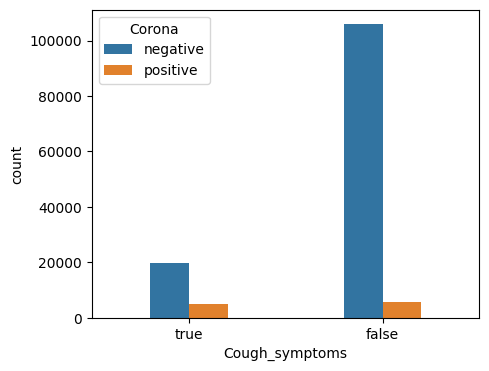

In [ ]:
# Creating a count plot to visualize the distribution of 'Cough_symptoms' with respect to 'Corona' outcomes
plt.figure(figsize=(5, 4))

# Using seaborn's countplot to visualize the data
sns.countplot(x="Cough_symptoms", hue="Corona", data=df1, width=0.4)


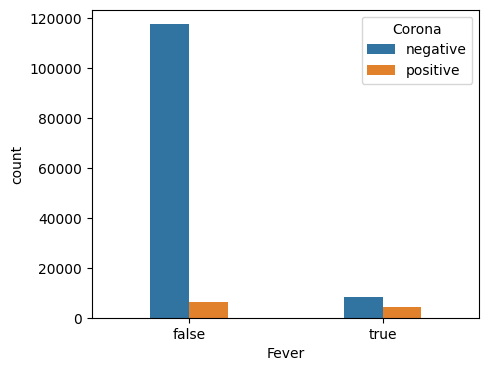

In [ ]:
# Creating a count plot to visualize the distribution of 'Fever' with respect to 'Corona' outcomes
plt.figure(figsize=(5, 4))

# Using seaborn's countplot to visualize the data
sns.countplot(x="Fever", hue="Corona", data=df1, width=0.4)

# Displaying the plot
plt.show()

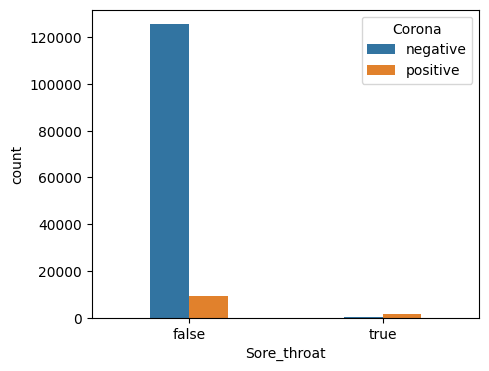

In [ ]:
# Creating a count plot to visualize the distribution of 'Sore_throat' with respect to 'Corona' outcomes
plt.figure(figsize=(5, 4))

# Using seaborn's countplot to visualize the data
sns.countplot(x="Sore_throat", hue="Corona", data=df1, width=0.4)

# Displaying the plot
plt.show()

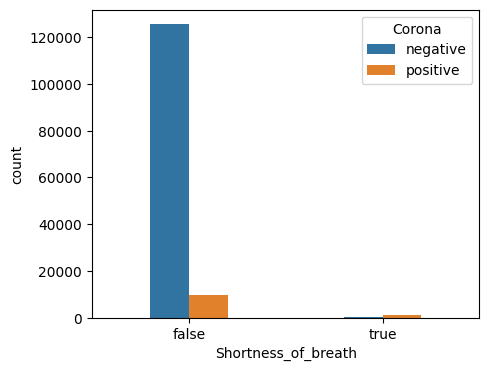

In [ ]:
# Creating a count plot to visualize the distribution of 'Shortness_of_breath' with respect to 'Corona' outcomes
plt.figure(figsize=(5, 4))

# Using seaborn's countplot to visualize the data
sns.countplot(x="Shortness_of_breath", hue="Corona", data=df1, width=0.4)

# Displaying the plot
plt.show()

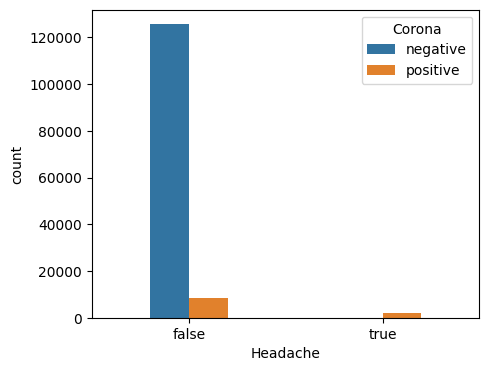

In [ ]:
# Creating a count plot to visualize the distribution of 'Headache' with respect to 'Corona' outcomes
plt.figure(figsize=(5, 4))

# Using seaborn's countplot to visualize the data
sns.countplot(x="Headache", hue="Corona", data=df1, width=0.4)

# Displaying the plot
plt.show()

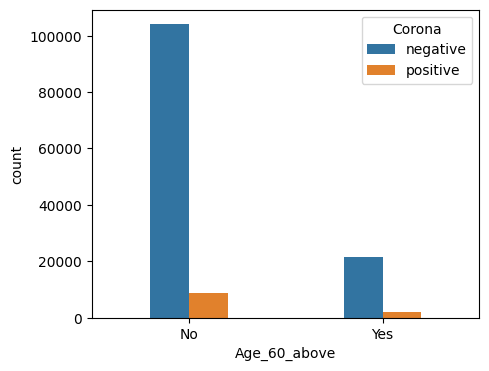

In [ ]:
# Creating a count plot to visualize the distribution of 'Age_60_above' with respect to 'Corona' outcomes
plt.figure(figsize=(5, 4))

# Using seaborn's countplot to visualize the data
sns.countplot(x='Age_60_above', hue='Corona', data=df1, width=0.4)

# Displaying the plot
plt.show()

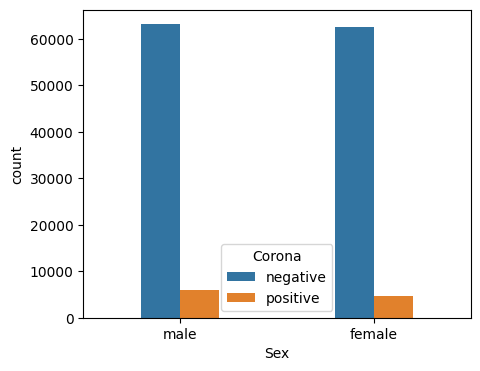

In [ ]:
# Creating a count plot to visualize the distribution of 'Age_60_above' with respect to 'Corona' outcomes
plt.figure(figsize=(5, 4))

# Using seaborn's countplot to visualize the data
sns.countplot(x='Age_60_above', hue='Corona', data=df1, width=0.4)

# Displaying the plot
plt.show()

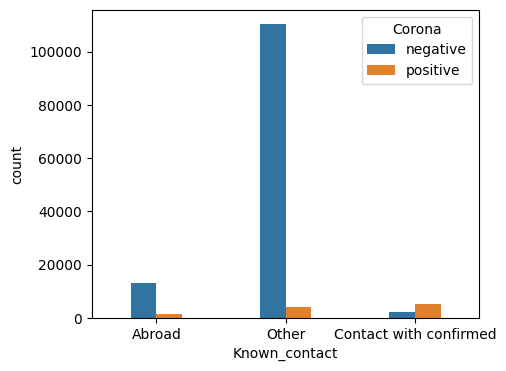

In [ ]:
# Creating a count plot to visualize the distribution of 'Known_contact' with respect to 'Corona' outcomes
plt.figure(figsize=(5, 4))

# Using seaborn's countplot to visualize the data
sns.countplot(x='Known_contact', hue='Corona', data=df1, width=0.4)

# Displaying the plot
plt.show()


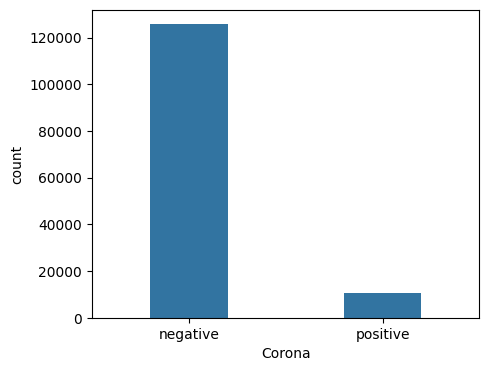

In [ ]:
# Creating a count plot to visualize the distribution of 'Corona' outcomes
plt.figure(figsize=(5, 4))

# Using seaborn's countplot to visualize the data
sns.countplot(x="Corona", data=df1, width=0.4)

# Displaying the plot
plt.show()

Data Cleaning


In [12]:
# Dropping columns 'Ind_ID' and 'Test_date' from the DataFrame
df.drop(columns=["Ind_ID", "Test_date"], axis=1, inplace=True)

Label Encoding

In [13]:
# Mapping values in the 'Corona' column to numerical representation
df['Corona'] = df['Corona'].map({"positive": 1, "negative": 0})

One-Hot-Encoding

In [14]:
# Applying one-hot encoding using get_dummies method
df=pd.get_dummies(df,columns=["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache","Age_60_above","Sex","Known_contact"],drop_first=True)

In [ ]:
# Displaying the first few rows of the DataFrame
df.head()

,Corona,Cough_symptoms_true,Fever_true,Sore_throat_true,Shortness_of_breath_true,Headache_true,Age_60_above_Yes,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
13727,0,1,0,0,0,0,0,1,0,0
13728,0,1,0,0,0,0,0,0,0,0
13730,1,1,1,0,0,0,1,0,0,1
13734,0,0,0,0,0,0,0,1,0,1
13735,0,0,0,0,0,0,0,0,0,1


In [15]:
# Calculating the correlation between features and the target variable 'Corona'
target_correlation = df.corr()['Corona']

# Displaying the correlation values
print(target_correlation)

Corona                                  1.000000
Cough_symptoms_true                     0.222507
Fever_true                              0.326357
Sore_throat_true                        0.328494
Shortness_of_breath_true                0.277832
Headache_true                           0.409489
Age_60_above_Yes                        0.014814
Sex_male                                0.034023
Known_contact_Contact with confirmed    0.554238
Known_contact_Other                    -0.357875
Name: Corona, dtype: float64


Positive Correlations:

Known Contact with Confirmed Cases: The feature "Known_contact_Contact with confirmed" has a relatively high positive correlation of 0.55. This suggests that individuals who have known contact with confirmed COVID-19 cases are more likely to test positive.

Headache: The feature "Headache_true" also shows a relatively high positive correlation of 0.41. This implies that the presence of headaches is positively associated with a positive COVID-19 diagnosis.

Fever and Sore Throat: "Fever_true" and "Sore_throat_true" also exhibit positive correlations (0.33 and 0.33, respectively). These symptoms are moderately associated with a positive COVID-19 diagnosis.

Negative Correlations:

Known Contact - Other: The feature "Known_contact_Other" has a negative correlation of approximately -0.36. This suggests that individuals with other types of known contacts (not confirmed cases) may be less likely to test positive.
Weak Correlations:

Age 60 Above and Sex: "Age_60_above_Yes" and "Sex_male" show relatively weak correlations (0.01 and 0.03, respectively). This indicates a weak association between these features and a positive COVID-19 diagnosis.

In summary, the features "Known_contact_Contact with confirmed," "Headache_true," "Fever_true," and "Sore_throat_true" appear to be more strongly correlated with a positive COVID-19 diagnosis. Conversely, the feature "Known_contact_Other" has a negative correlation, indicating a potential protective effect.

Feature Engineering

In [16]:
# Feature Scaling using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

# Separating features (X) and the target variable (y)
X = df.drop('Corona', axis=1)
y = df['Corona']

# Initializing the Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Transforming features to a scaled range (0 to 1)
X_normalized = min_max_scaler.fit_transform(X)

# Creating a DataFrame with scaled features
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Displaying the first few rows of the normalized DataFrame
df_normalized.head()

,Cough_symptoms_true,Fever_true,Sore_throat_true,Shortness_of_breath_true,Headache_true,Age_60_above_Yes,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Data Splitting for Train and Test

In [17]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Performing train-test split on the normalized features (X_normalized) and the target variable (y)
# test_size=0.2 indicates that 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

Logistic Regression

In [18]:
# Creating and training a Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initializing the Logistic Regression model
model = LogisticRegression()

# Training the model using the training data
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Making predictions using the trained Logistic Regression model
y_pred = model.predict(X_test)

In [ ]:
X_test

array([0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Calculating and displaying the Confusion Matrix
from sklearn.metrics import confusion_matrix

# Using the confusion_matrix function to compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Printing the Confusion Matrix
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[24773   315]
 [  945  1226]]


In [ ]:
# Generating and displaying the Classification Report
from sklearn.metrics import classification_report

# Using the classification_report function to compute a detailed classification report
report = classification_report(y_test, y_pred)

# Printing the Classification Report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     25088
           1       0.80      0.56      0.66      2171

    accuracy                           0.95     27259
   macro avg       0.88      0.78      0.82     27259
weighted avg       0.95      0.95      0.95     27259



We can see here that the accuracy from Logistic Regression model is 95%.
Now let us check with other models too

In [ ]:
# Calculating and displaying regression evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Printing the results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.04622326571040757
Mean Squared Error: 0.04622326571040757
R-squared: 0.3693990795880765


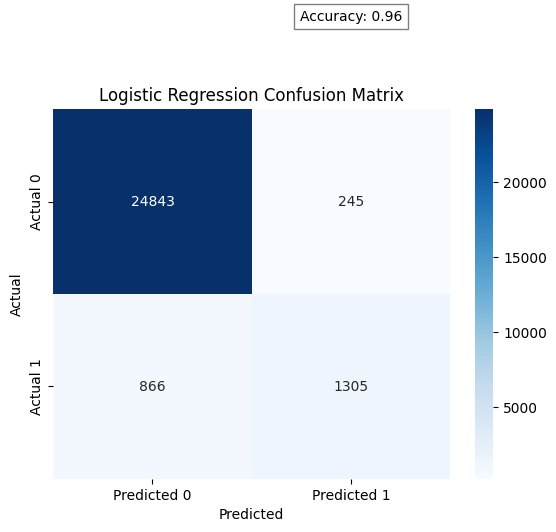

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# y_test and y_pred should be arrays or Pandas Series

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Set plot labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')

# Display accuracy in the plot
accuracy = accuracy_score(y_test, y_pred)
plt.text(1.5, -0.5, f'Accuracy: {accuracy:.2f}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()

Random Forest Classifier

In [ ]:
# Splitting the dataset into training and testing sets (alternate split)
from sklearn.model_selection import train_test_split

# Performing train-test split on the normalized features (X_normalized) and the target variable (y)
# test_size=0.2 indicates that 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures reproducibility of the split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
# Creating a Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest Classifier model with a fixed random state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Training the Random Forest Classifier model
rf_model.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

In [ ]:
# Making predictions using the trained Random Forest Classifier model
y_pred_rf = rf_model.predict(X_test1)

In [ ]:
# Calculating accuracy and confusion matrix for the Random Forest Classifier model
accuracy_rf = accuracy_score(y_test1, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test1, y_pred_rf)

In [ ]:
# Displaying evaluation metrics for the Random Forest Classifier model
print("Random Forest Model:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test1, y_pred_rf))


Random Forest Model:
Accuracy: 0.9594262445430867
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     25088
           1       0.84      0.60      0.70      2171

    accuracy                           0.96     27259
   macro avg       0.90      0.80      0.84     27259
weighted avg       0.96      0.96      0.96     27259



In Random Forest Algorithm, we can see that Accuracy is 96% which is 1% higher than Logistic Regression

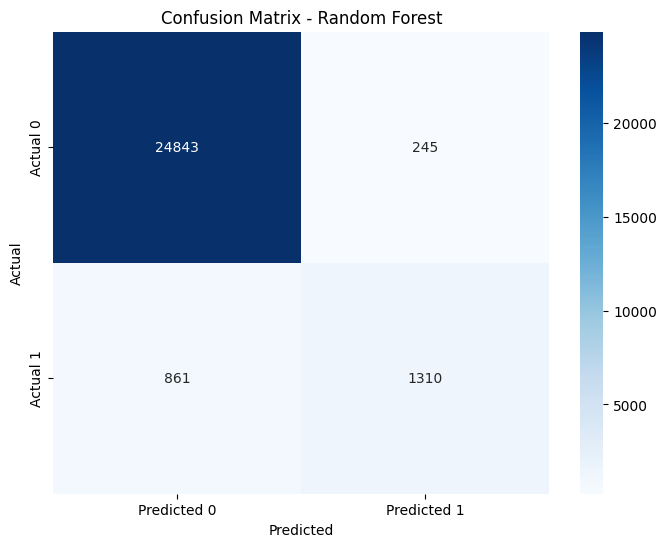

In [ ]:
# Visualizing the Confusion Matrix for the Random Forest Classifier model
plt.figure(figsize=(8, 6))

# Using seaborn's heatmap to display the confusion matrix with annotations
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Adding labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

# Displaying the plot
plt.show()

Support Vector Machine

In [ ]:
# Importing the Support Vector Machine (SVM) model and relevant metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Splitting the dataset into training and testing sets for SVM (alternate split)
from sklearn.model_selection import train_test_split

# Performing train-test split on the normalized features (X_normalized) and the target variable (y)
# test_size=0.2 indicates that 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures reproducibility of the split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing the SVM model with a fixed random state for reproducibility
svm_model = SVC(random_state=42)

In [ ]:
# Training the Support Vector Machine (SVM) model
svm_model.fit(X_train2, y_train2)

SVC(random_state=42)

In [ ]:
# Making predictions using the trained Support Vector Machine (SVM) model
y_pred_svm = svm_model.predict(X_test2)

In [ ]:
# Calculating accuracy and confusion matrix for the Support Vector Machine (SVM) model
accuracy_svm = accuracy_score(y_test2, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test2, y_pred_svm)

In [ ]:
# Displaying evaluation metrics for the Support Vector Machine (SVM) model
print("Support Vector Machine (SVM) Model:")
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", classification_report(y_test2, y_pred_svm))

Support Vector Machine (SVM) Model:
Accuracy: 0.959866466121281
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     25088
           1       0.84      0.61      0.71      2171

    accuracy                           0.96     27259
   macro avg       0.91      0.80      0.84     27259
weighted avg       0.96      0.96      0.96     27259



In Support Vector Machine(SVM), we can see that Accuracy is 96% which is Same as Decision Tree and Random Forest Classifier

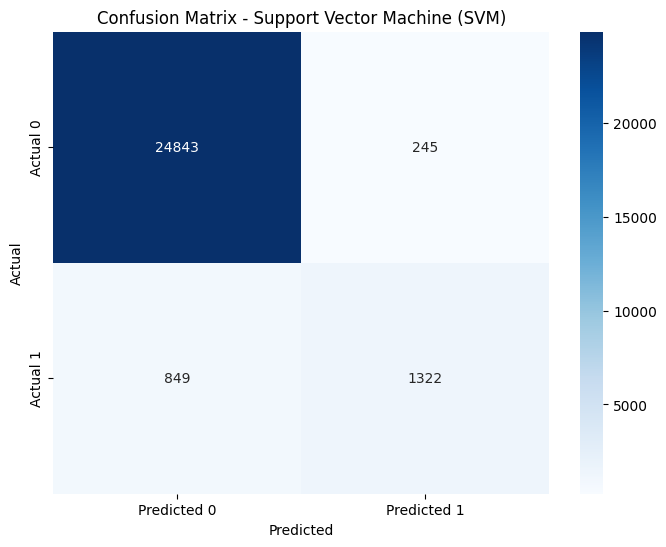

In [ ]:
# Visualizing the Confusion Matrix for the Support Vector Machine (SVM) model
plt.figure(figsize=(8, 6))

# Using seaborn's heatmap to display the confusion matrix with annotations
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Adding labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')

# Displaying the plot
plt.show()

Decision Tree Classifier

In [ ]:
# Importing the Decision Tree Classifier and relevant metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Splitting the dataset into training and testing sets for Decision Tree (alternate split)
from sklearn.model_selection import train_test_split

# Performing train-test split on the normalized features (X_normalized) and the target variable (y)
# test_size=0.2 indicates that 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures reproducibility of the split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing the Decision Tree model with a fixed random state for reproducibility
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
# Training the Decision Tree Classifier model
dt_model.fit(X_train3, y_train3)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Making predictions using the trained Decision Tree Classifier model
y_pred_dt = dt_model.predict(X_test3)

In [ ]:
# Calculating accuracy and confusion matrix for the Decision Tree Classifier model
accuracy_dt = accuracy_score(y_test3, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test3, y_pred_dt)

In [ ]:
# Displaying evaluation metrics for the Decision Tree Classifier model
print("Decision Tree Model:")
print("Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_test3, y_pred_dt))


Decision Tree Model:
Accuracy: 0.9592428188855057
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     25088
           1       0.84      0.60      0.70      2171

    accuracy                           0.96     27259
   macro avg       0.90      0.80      0.84     27259
weighted avg       0.96      0.96      0.96     27259



In Decision Tree Algorithm, we can see that Accuracy is 96% which is same as Random Forest Classifier and Support Vector Machine(SVM)

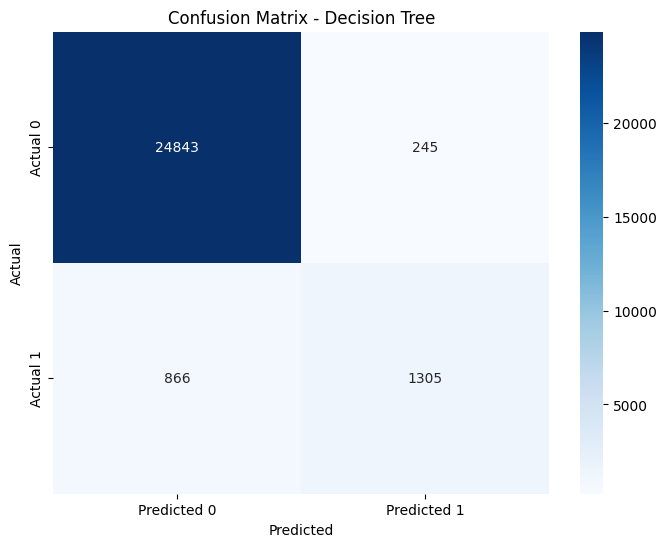

In [ ]:
# Visualizing the Confusion Matrix for the Decision Tree Classifier model
plt.figure(figsize=(8, 6))

# Using seaborn's heatmap to display the confusion matrix with annotations
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Adding labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')

# Displaying the plot
plt.show()

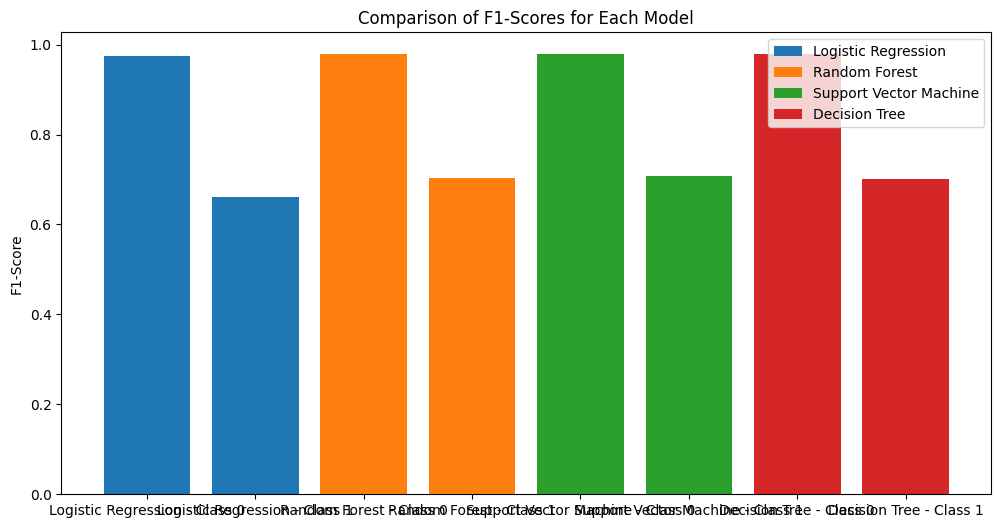

In [ ]:
logistic_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Train models
models = [logistic_model, rf_model, svm_model, dt_model]
model_names = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Decision Tree']

# Collect classification reports
reports = []
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    reports.append({'model': name, 'report': report})

# Create a bar plot for F1-scores of each model
plt.figure(figsize=(12, 6))
for report in reports:
    f1_scores = [report['report'][label]['f1-score'] for label in ['0', '1']]
    plt.bar([f"{report['model']} - {label}" for label in ['Class 0', 'Class 1']], f1_scores, label=report['model'])

plt.ylabel('F1-Score')
plt.title('Comparison of F1-Scores for Each Model')
plt.legend()
plt.show()

SQL

In [ ]:
df1=df.copy()

In [ ]:
# Importing the duckdb library for connecting to DuckDB
import duckdb

# Establishing a connection to DuckDB
conn = duckdb.connect()

# Registering the DataFrame 'df1' in the DuckDB connection
conn.register('df', df1)

1. Find the number of corona patients who faced shortness of breath.

In [ ]:
conn.execute("SELECT COUNT(*) AS num_shortness_of_breath FROM df1 WHERE Corona = 'positive' AND Shortness_of_breath = 'true';").fetchdf()

,num_shortness_of_breath
0,975


2. Find the number of negative corona patients who have fever and sore_throat.

In [ ]:
conn.execute("SELECT COUNT(*) AS num_negative_with_fever_sore_throat FROM df1 WHERE Corona = 'negative' AND Fever = 'true' AND Sore_throat = 'true';").fetchdf()

,num_negative_with_fever_sore_throat
0,41


3. Group the data by month and rank the number of positive cases.

In [ ]:
conn.execute("SELECT MONTH(Test_date) AS months, COUNT(CASE WHEN corona = 'positive' THEN 1 END) AS total_positive_cases, RANK() OVER (ORDER BY COUNT(CASE WHEN corona = 'positive' THEN 1 END) DESC) AS Ranks FROM df1 WHERE corona = 'positive' GROUP BY months;").fetchdf()

,months,total_positive_cases,Ranks
0,4,5866,1
1,3,4760,2


4. Find the female negative corona patients who faced cough and headache.

In [ ]:
conn.execute("SELECT COUNT(*) AS num_female_negative_cough_headache FROM df1 WHERE Corona = 'negative' AND Sex = 'female' AND Cough_symptoms = 'true' AND Headache = 'true';").fetchdf()

,num_female_negative_cough_headache
0,29


5. How many elderly corona patients have faced breathing problems?

In [ ]:
conn.execute("SELECT COUNT(*) AS num_elderly_breathing_problems FROM df1 WHERE Corona = 'positive' AND Age_60_above = 'Yes' AND Shortness_of_breath = 'true';").fetchdf()

,num_elderly_breathing_problems
0,227


6. Which three symptoms were more common among COVID positive patients?

In [ ]:
query="SELECT symptom, count(*) AS total_count FROM (SELECT 'Cough_symptoms' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'positive' AND Cough_symptoms = 'TRUE' UNION ALL SELECT 'Fever' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'positive' AND Fever = 'TRUE' UNION ALL SELECT 'Sore_throat' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'positive' AND Sore_throat = 'TRUE' UNION ALL SELECT 'Shortness_of_breath' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'positive' AND Shortness_of_breath = 'TRUE' UNION ALL SELECT 'Headache' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'positive' AND Headache = 'TRUE') as x GROUP BY symptom ORDER BY total_count DESC LIMIT 3;"
conn.execute(query).fetchdf()

,symptom,total_count
0,Cough_symptoms,1
1,Sore_throat,1
2,Shortness_of_breath,1


7. Which symptom was less common among COVID negative people?

In [ ]:
query1="SELECT symptom, SUM(count) AS total_count FROM (SELECT 'Cough_symptoms' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'negative' AND Cough_symptoms = 'TRUE' UNION ALL SELECT 'Fever' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'negative' AND Fever = 'TRUE' UNION ALL SELECT 'Sore_throat' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'negative' AND Sore_throat = 'TRUE' UNION ALL SELECT 'Shortness_of_breath' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'negative' AND Shortness_of_breath = 'TRUE' UNION ALL SELECT 'Headache' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'negative' AND Headache = 'TRUE') AS x GROUP BY symptom ORDER BY total_count ASC LIMIT 1;"
conn.execute(query1).fetchdf()

,symptom,total_count
0,Cough_symptoms,0.0


8. What are the most common symptoms among COVID positive males whose known contact was abroad?



In [ ]:
query2="SELECT symptom, count(*) AS total_count FROM (SELECT 'Cough_symptoms' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'positive' AND Cough_symptoms = 'TRUE' AND Sex='Male' AND Known_contact ='abroad' UNION ALL SELECT 'Fever' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'positive' AND Fever = 'TRUE' And Sex='Male' AND Known_contact ='abroad' UNION ALL SELECT 'Sore_throat' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'positive' AND Sore_throat = 'TRUE' AND Sex='Male' AND Known_contact ='abroad' UNION ALL SELECT 'Shortness_of_breath' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'positive' AND Shortness_of_breath = 'TRUE' AND Sex='Male' AND Known_contact ='abroad' UNION ALL SELECT 'Headache' AS symptom, COUNT(*) AS count FROM df1 WHERE Corona = 'positive' AND Headache = 'TRUE' And Sex='Male' AND Known_contact ='abroad') AS x GROUP BY symptom ORDER BY total_count DESC LIMIT 1;"
conn.execute(query2).fetchdf()

,symptom,total_count
0,Fever,1


In [20]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

results_df.to_csv('predicted_vs_actual.csv', index=False)